# Movie Dataset Analysis

**Creator:** Simon Gneuß  
**Enrollment Number:** 23.01.038

## Introduction

This project involves analyzing a movie dataset to uncover interesting patterns and insights related to **genres, actors, movies,** and **themes**. The dataset comprises approximately **1 million movies** and is structured across four CSV files, detailing different aspects of each movie.

As an extreme movie enthusiast, I'm always looking for new movies to watch. This project aims to find interesting insights that will help discover new movies and develop a basic recommendation system.

## Questions to Explore

1. **What are the most popular movie genres?**
2. **What trends can be observed in movie releases?**
3. **How do average ratings vary across different genres?**
4. **Is there a correlation between a movie’s duration and its rating?**
5. **Who are the most prolific actors in the dataset, and how do movies from known actors perform in terms of ratings?**

## Dataset

The dataset is sourced from [Kaggle](https://www.kaggle.com/datasets/gsimonx37/letterboxd/data) and includes:

- **Genres:** Categorization of movies by genre.
- **Actors:** Information about the cast in each movie.
- **Movies:** Details about individual movies.
- **Themes:** Various themes associated with each movie.

Let's start by importing the necessary libraries and loading the data.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load datasets
genres_df = pd.read_csv('movie_dataset/genres.csv')
actors_df = pd.read_csv('movie_dataset/actors.csv')
movies_df = pd.read_csv('movie_dataset/movies.csv')
themes_df = pd.read_csv('movie_dataset/themes.csv')

print(f"Genres dataset shape: {genres_df.shape}")
print(f"Actors dataset shape: {actors_df.shape}")
print(f"Movies dataset shape: {movies_df.shape}")
print(f"Themes dataset shape: {themes_df.shape}")

Genres dataset shape: (1046849, 2)
Actors dataset shape: (5798450, 3)
Movies dataset shape: (941597, 7)
Themes dataset shape: (125641, 2)


## Assessing Data Quality

After examining my four CSV files, I found that the data is in excellent condition. This is the result of my research to find a good fitting dataset that offers a lot of information, contains no NaN values in critical fields, and is already well-organized. As a result, I don’t need to spend much time on data cleaning. Only after merging the datasets did I encounter some missing values, but they were in non-essential areas.

## Genres Analysis

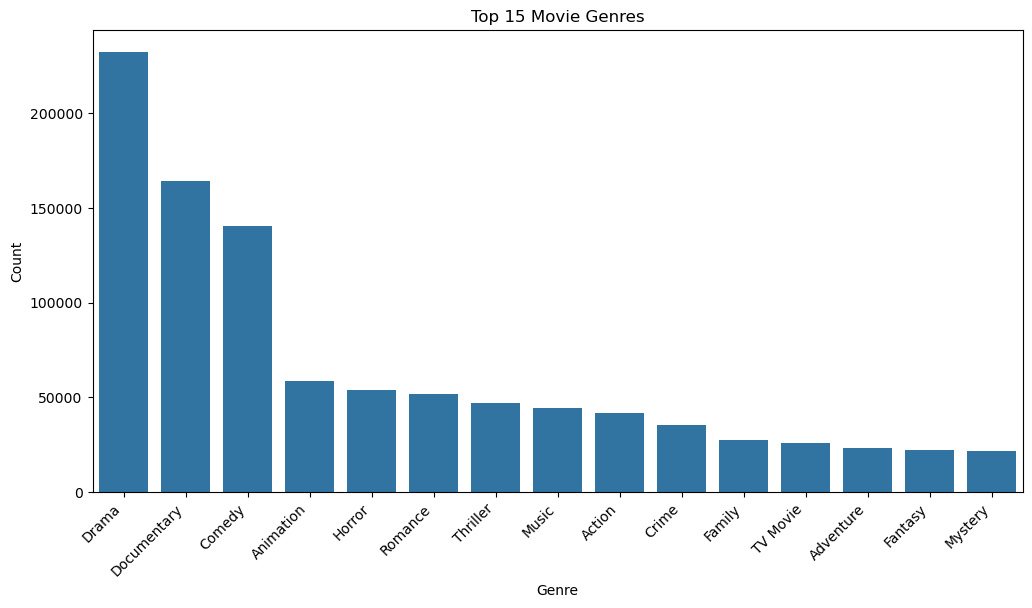

Total number of unique genres: 19
Top 5 genres: Drama, Documentary, Comedy, Animation, Horror


In [20]:
genre_counts = genres_df["genre"].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index[:15], y=genre_counts.values[:15])
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Top 15 Movie Genres")
plt.xticks(rotation=45, ha='right')
plt.show()

print(f"Total number of unique genres: {len(genre_counts)}")
print(f"Top 5 genres: {', '.join(genre_counts.index[:5])}")

## Movies Releases

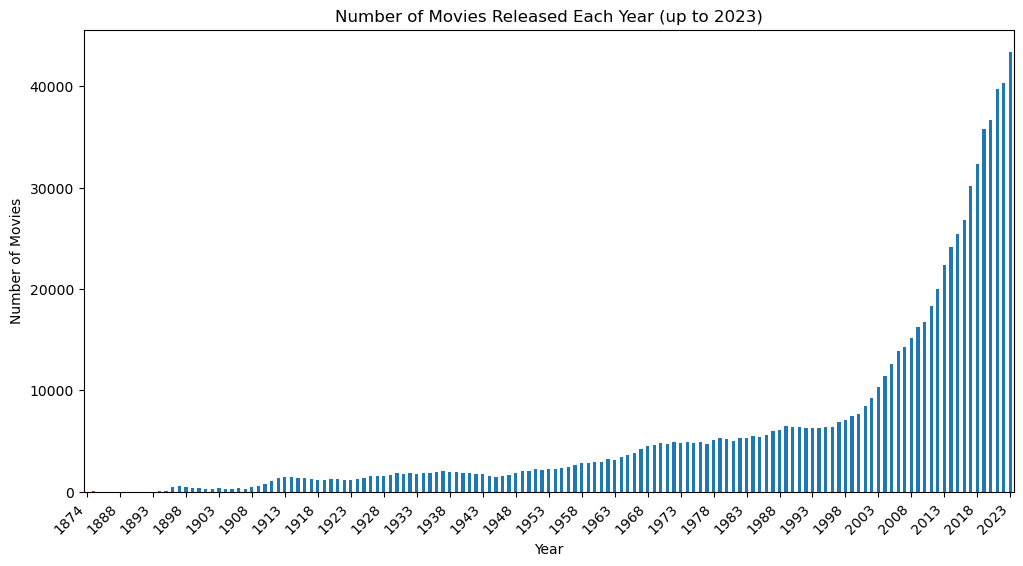

Total number of movies: 941597


In [21]:
# Plot number of movies released each year
year_counts = movies_df[movies_df['date'] <= 2023]['date'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
year_counts.plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.title("Number of Movies Released Each Year (up to 2023)")

plt.xticks(ticks=range(0, len(year_counts), 5), labels=[str(int(label)) for label in year_counts.index[::5]], rotation=45, ha="right")
plt.show()

print(f"Total number of movies: {len(movies_df)}")

## Rating Analysis

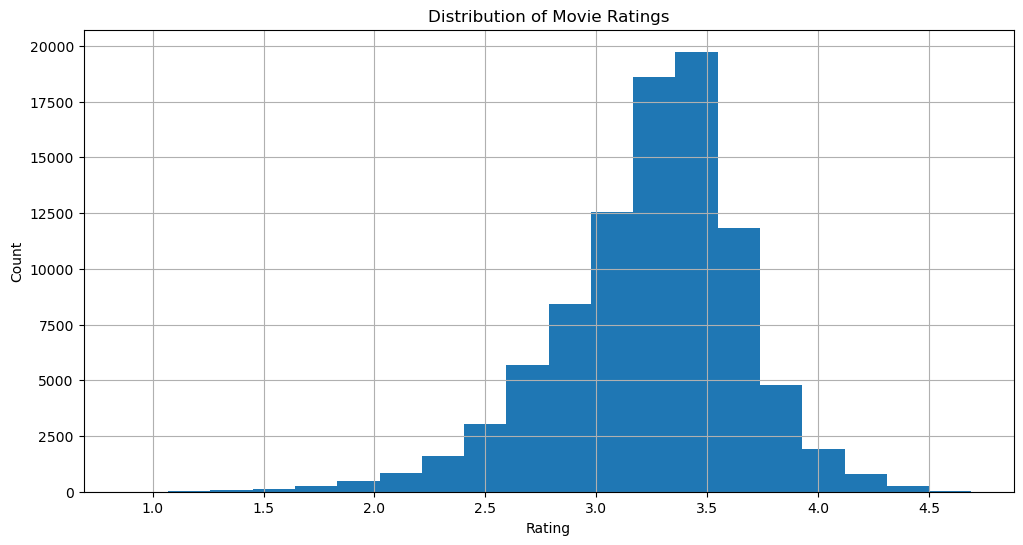

Average movie rating: 3.24
Median movie rating: 3.30


In [22]:
# Plot rating distribution
plt.figure(figsize=(12, 6))
movies_df['rating'].hist(bins=20)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Movie Ratings")
plt.show()


print(f"Average movie rating: {movies_df['rating'].mean():.2f}")
print(f"Median movie rating: {movies_df['rating'].median():.2f}")

### Merge datasets to make Correlation Analysis

In [23]:
# Merge datasets on a common key
combined_df = movies_df.merge(genres_df, on='id', suffixes=('_movie', '_genre')) \
                       .merge(actors_df, on='id', suffixes=('', '_actor')) \

combined_df.shape

(9685015, 10)

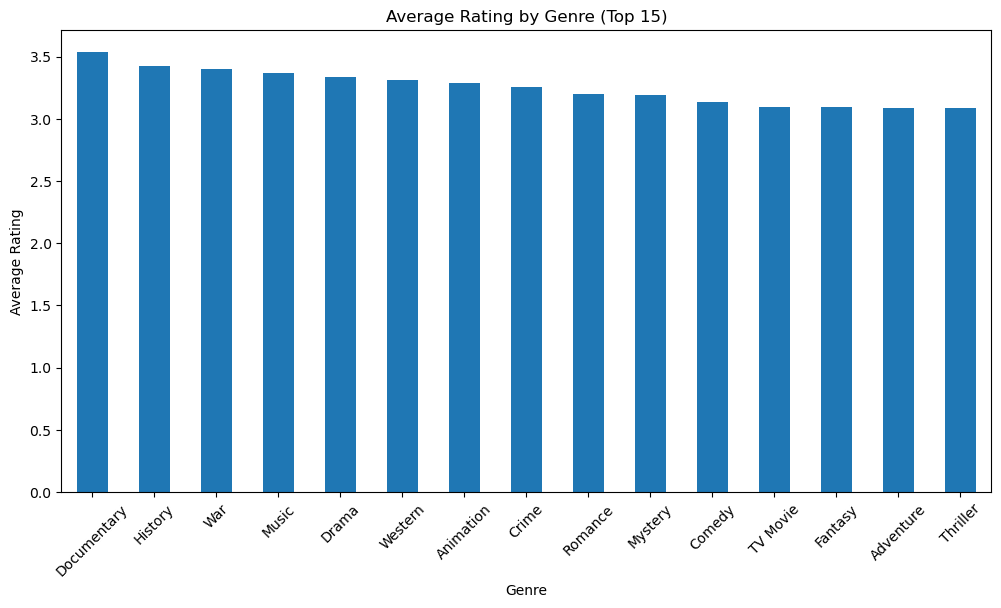

Genre with highest average rating: Documentary (3.54)
Genre with lowest average rating: Horror (2.90)


In [24]:
# Calculate average rating for each genre
genre_ratings = combined_df.groupby('genre')['rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
genre_ratings[:15].plot(kind='bar')
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.title("Average Rating by Genre (Top 15)")
plt.xticks(rotation=45)
plt.show()


print(f"Genre with highest average rating: {genre_ratings.index[0]} ({genre_ratings.values[0]:.2f})")
print(f"Genre with lowest average rating: {genre_ratings.index[-1]} ({genre_ratings.values[-1]:.2f})")

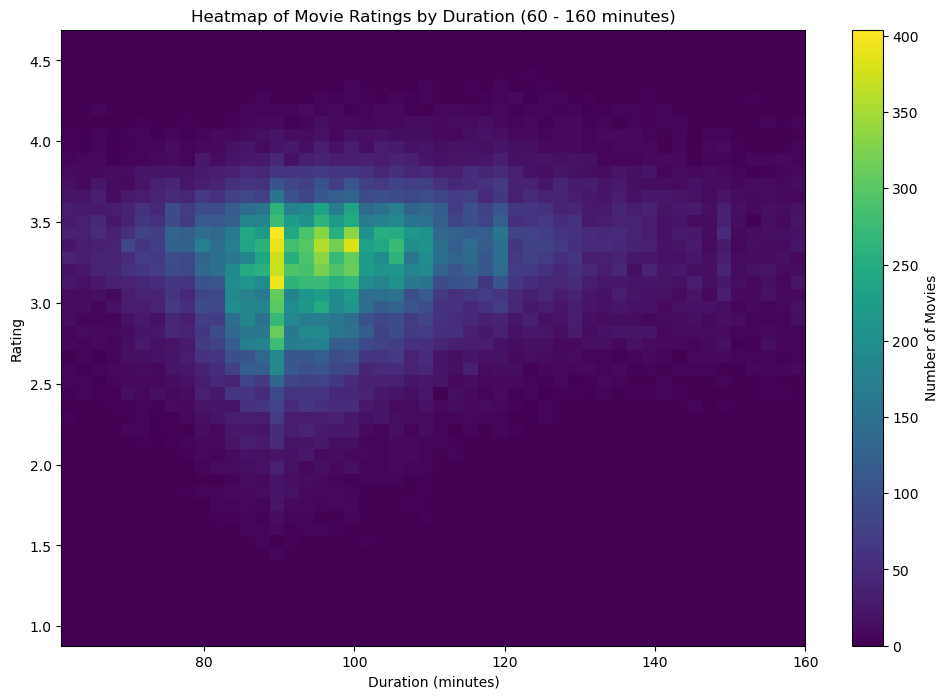

In [25]:
filtered_df = movies_df[(movies_df['minute'] <= 160) & (movies_df['minute'] > 60)]
filtered_df = filtered_df.dropna(subset=['minute', 'rating'])

plt.figure(figsize=(12, 8))
heatmap_data = filtered_df[['minute', 'rating']]
heatmap, xedges, yedges = np.histogram2d(heatmap_data['minute'], heatmap_data['rating'], bins=(50, 50))

plt.imshow(heatmap.T, origin='lower', aspect='auto', cmap='viridis', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.colorbar(label='Number of Movies')
plt.title('Heatmap of Movie Ratings by Duration (60 - 160 minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Rating')
plt.show()

## Actors Analysis

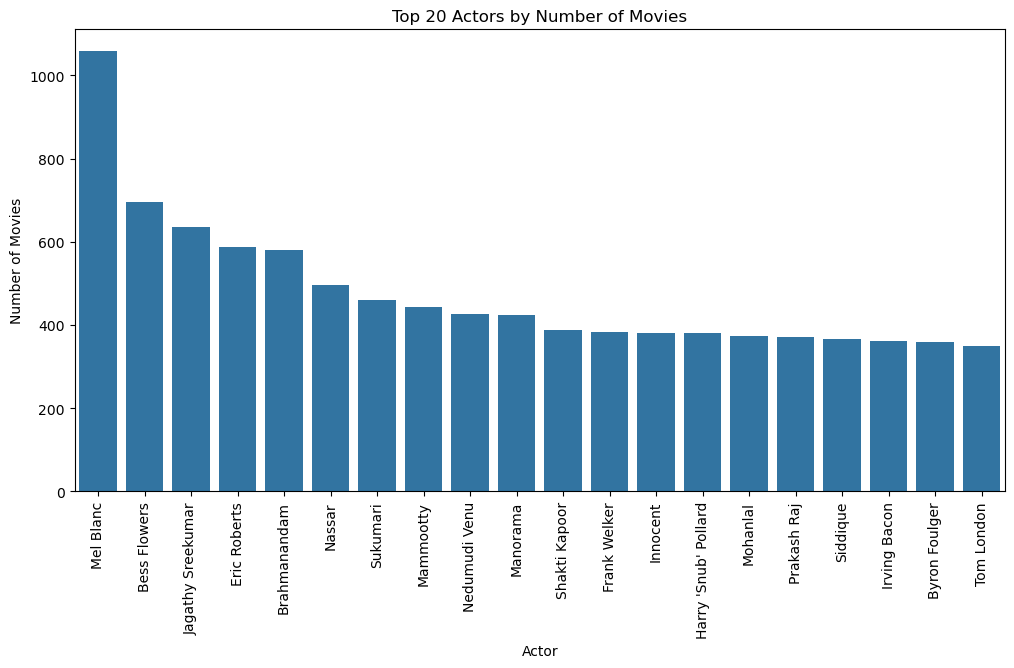

Total number of unique actors: 1600662
Top 5 actors: Mel Blanc, Bess Flowers, Jagathy Sreekumar, Eric Roberts, Brahmanandam
Fun fact: Mel Blanc, was a renowned American voice actor celebrated of Bugs Bunny, Daffy Duck, Porky Pig, and many many more.


In [26]:
actor_counts = actors_df["name"].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=actor_counts.index[:20], y=actor_counts.values[:20])
plt.xlabel("Actor")
plt.ylabel("Number of Movies")
plt.title("Top 20 Actors by Number of Movies")
plt.xticks(rotation=90)
plt.show()

print(f"Total number of unique actors: {len(actor_counts)}")
print(f"Top 5 actors: {', '.join(actor_counts.index[:5])}")
print("Fun fact: Mel Blanc, was a renowned American voice actor celebrated of Bugs Bunny, Daffy Duck, Porky Pig, and many many more.")

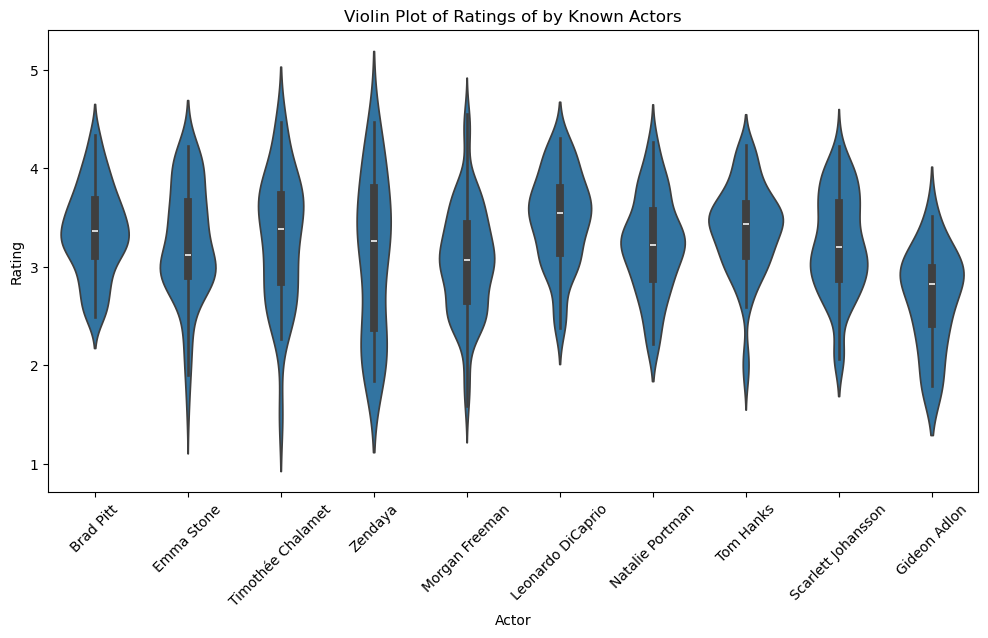

In [27]:
# Plot the violin plot for the known actors
known_actors = ['Leonardo DiCaprio', 'Timothée Chalamet', 'Gideon Adlon', 'Tom Hanks', 'Scarlett Johansson', 'Brad Pitt', 'Zendaya', 'Natalie Portman', 'Morgan Freeman', 'Emma Stone']

filtered_df = combined_df[combined_df['name_actor'].isin(known_actors)]

plt.figure(figsize=(12, 6))
sns.violinplot(x='name_actor', y='rating', data=filtered_df)
plt.xlabel("Actor")
plt.ylabel("Rating")
plt.title("Violin Plot of Ratings of by Known Actors")
plt.xticks(rotation=45)
plt.show()

## Conclusion



This analysis provided an overview of trends, ratings, genres, and actors in the film industry. I uncovered popular and highly-rated genres, observed movie release trends over time, and identified correlations between duration and ratings. The actor analysis highlighted good performers and their impact on movie success.

Overall, this project was really fun for me as a movie enthusiast and was the groundwork for a recommendation system that I am looking for to implement.